In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [5]:
rep_csv = pd.read_csv('../../input/inception_reps_full_images_illumcorr_channelasimg.csv')
moa_csv = pd.read_csv('../../input/BBBC021_v1_moa.csv')

In [6]:
unique_moas = moa_csv['moa'].drop_duplicates()
unique_moas.sort_values(inplace=True)

moas = [list(unique_moas)[elem] for elem
                   in rep_csv['labels']]

In [7]:
print rep_csv.head()
rep_csv.shape

  compound  concentration  labels  chan0_feature0  chan0_feature1  \
0     ALLN            3.0      10        0.196947        0.091845   
1     ALLN          100.0      10        0.178245        0.062145   
2     AZ-A            0.1       1        0.136870        0.058791   
3     AZ-A            0.3       1        0.114995        0.066382   
4     AZ-A            1.0       1        0.117767        0.041122   

   chan0_feature2  chan0_feature3  chan0_feature4  chan0_feature5  \
0        0.289616        0.484531        0.303347        0.540037   
1        0.419259        0.123027        0.136319        0.277520   
2        0.556461        0.263722        0.457050        0.634683   
3        0.459272        0.366937        0.540488        0.699026   
4        0.504718        0.288576        0.491762        0.671241   

   chan0_feature6        ...          chan2_feature2038  chan2_feature2039  \
0        0.011096        ...                   0.534846           0.417946   
1        0.016

(103, 6147)

In [10]:
model = TSNE(n_components=2, random_state=0)
reps = model.fit_transform(rep_csv.iloc[:, 3:])

In [11]:
print reps.shape

(103, 2)


In [30]:
tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
tsne_reps['moa'] = moas
tsne_reps[['x', 'y']] = reps

tsne_reps = tsne_reps[tsne_reps['moa'] != 'DMSO']

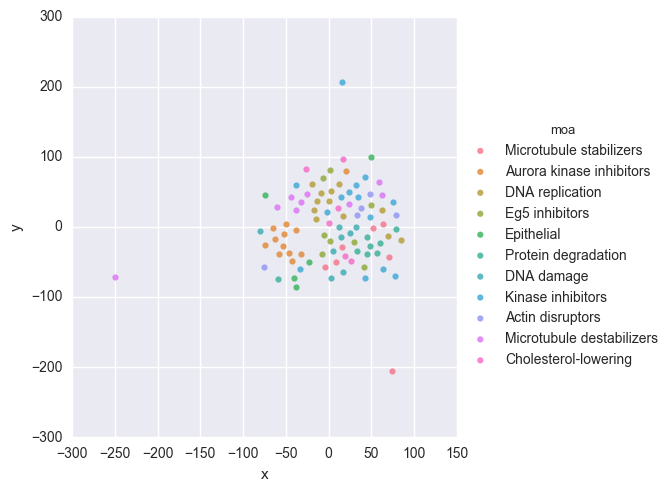

In [31]:
sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
plt.show()

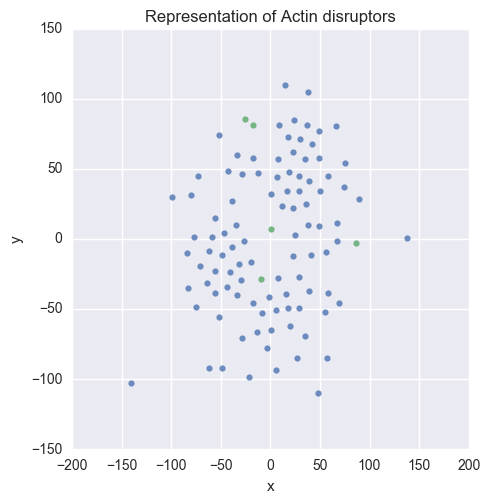

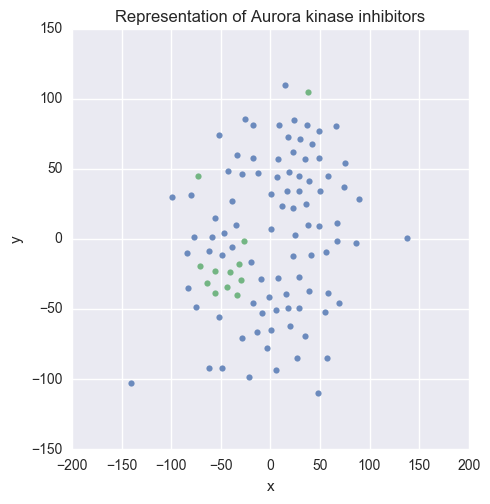

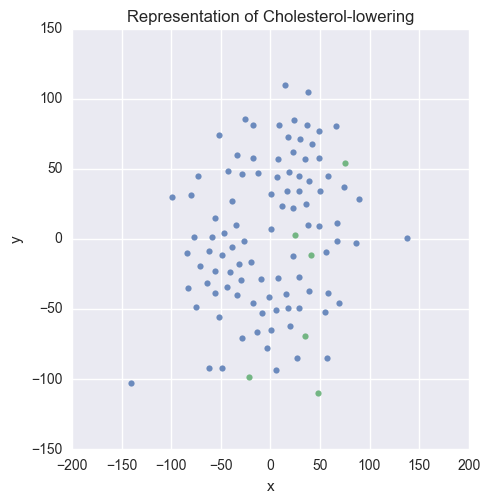

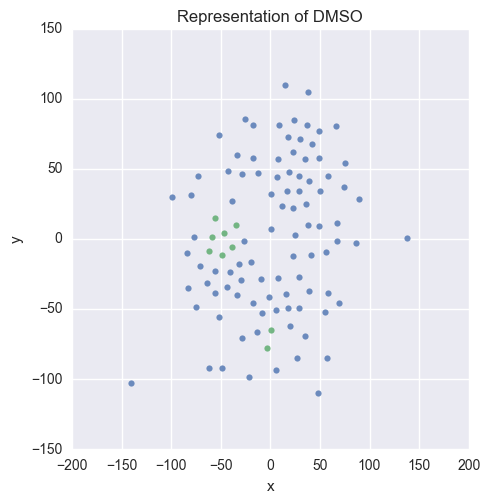

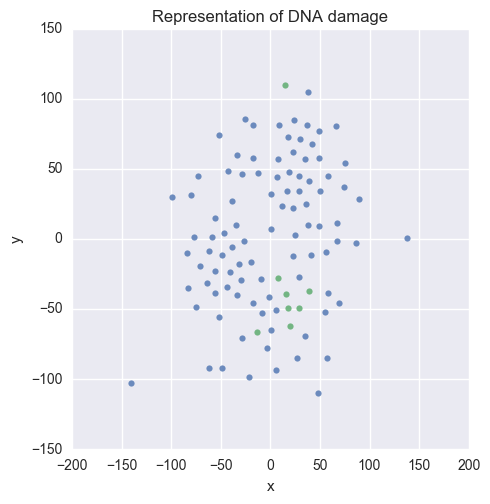

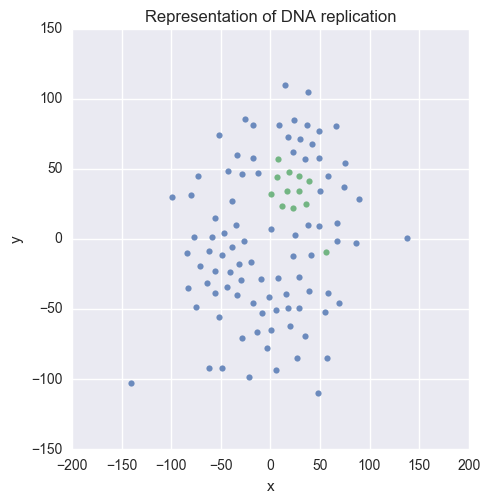

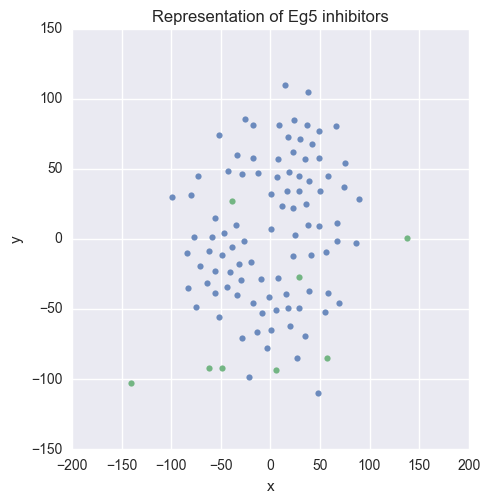

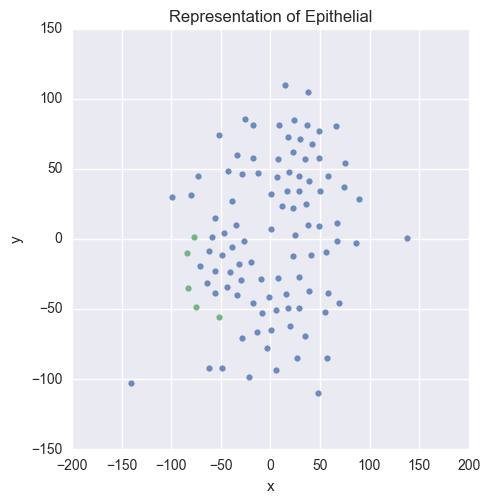

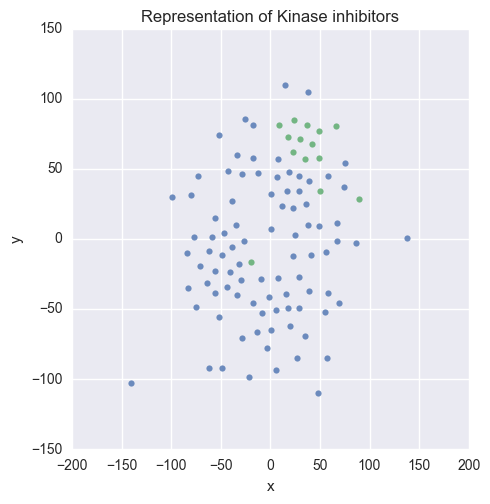

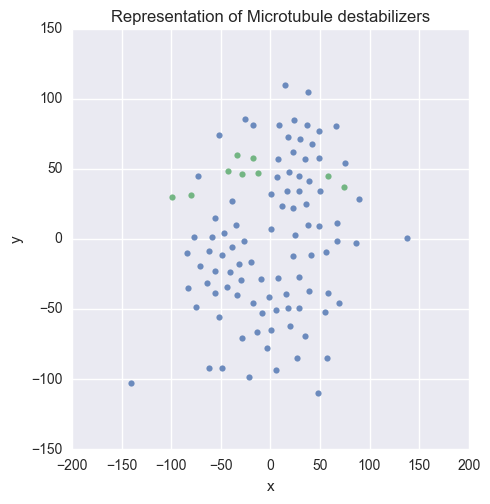

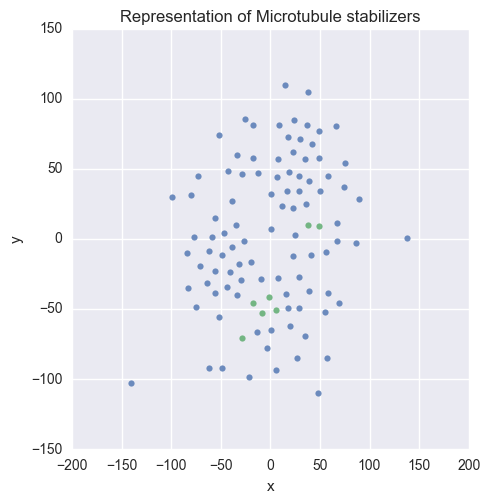

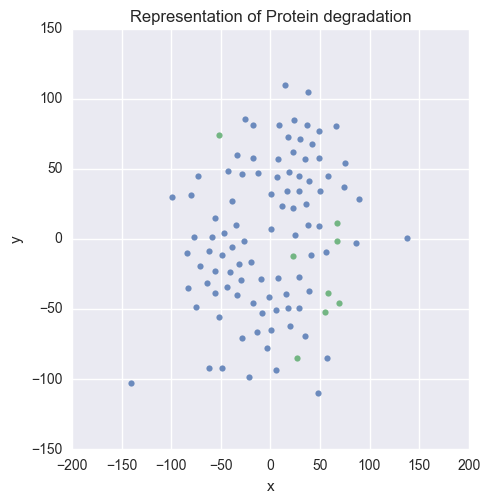

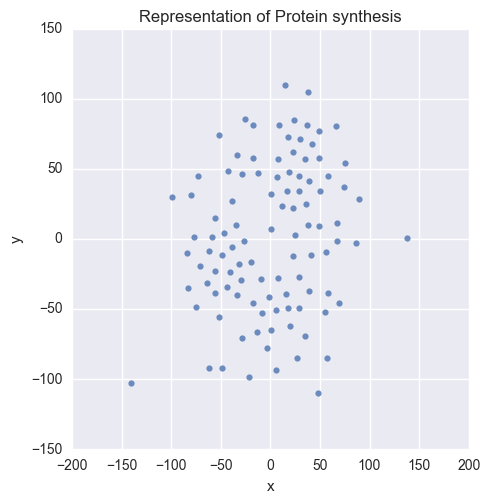

In [27]:
for moa in unique_moas:
    tsne_reps['hue'] = 0
    tsne_reps.loc[tsne_reps['moa'] == moa, 'hue'] = 1
    tsne_reps = tsne_reps[tsne_reps['moa'] != 'DMSO']
    sns.lmplot(x="x", y="y", hue="hue", data=tsne_reps,
               fit_reg=False, legend=False)
    plt.title('Representation of %s' % moa)
    plt.show()

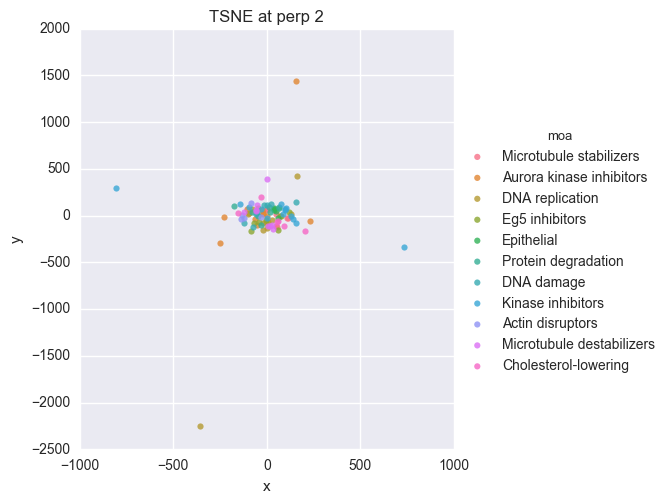

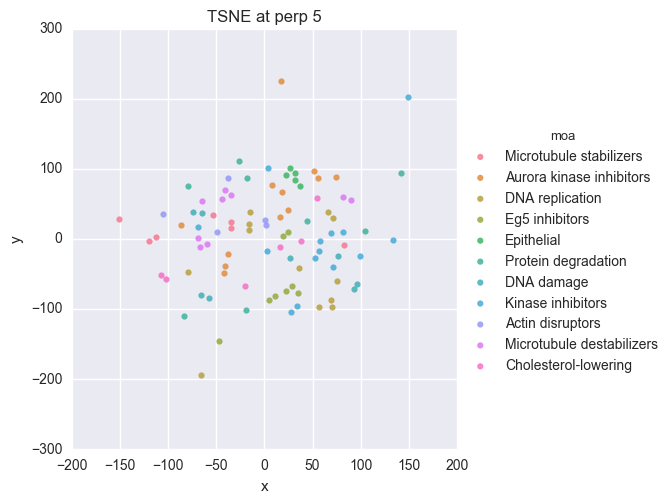

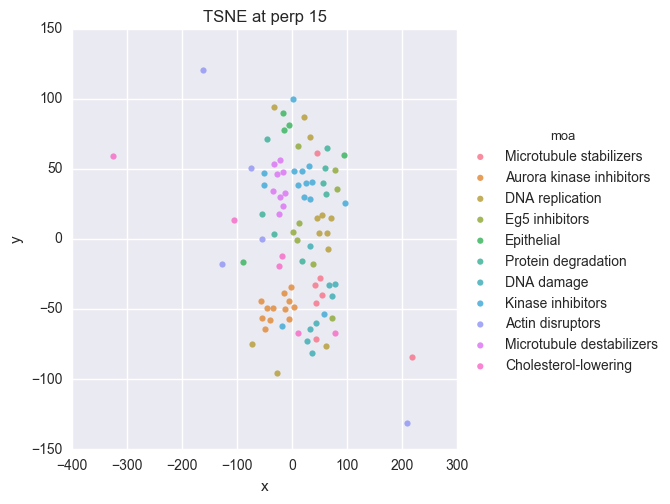

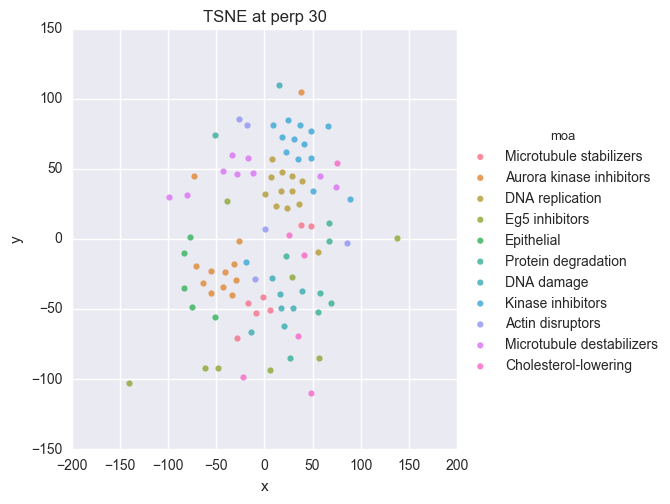

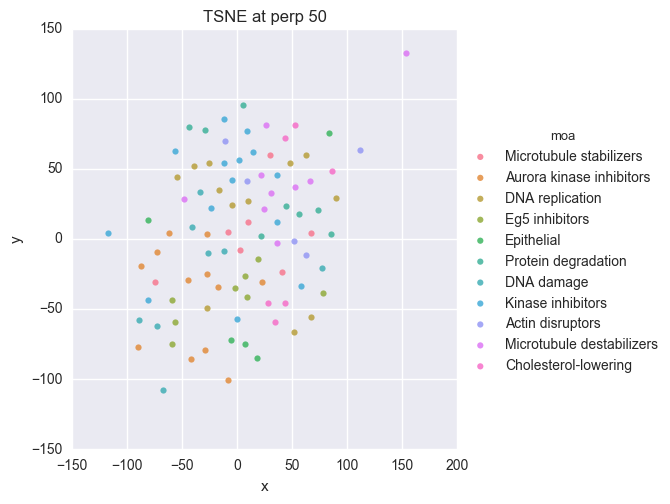

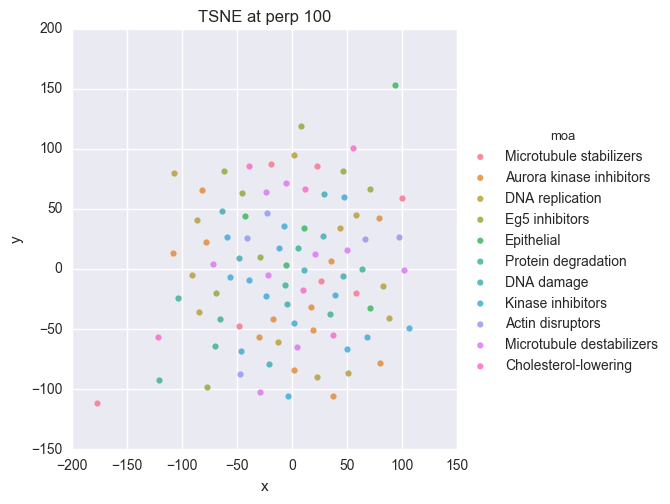

In [32]:
for perp in [2, 5, 15, 30, 50, 100]:
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(rep_csv.iloc[:, 3:])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['moa'] = moas
    tsne_reps[['x', 'y']] = reps
    tsne_reps = tsne_reps[tsne_reps['moa'] != 'DMSO']
    sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('TSNE at perp %d' % perp)
    plt.show()

perp 10


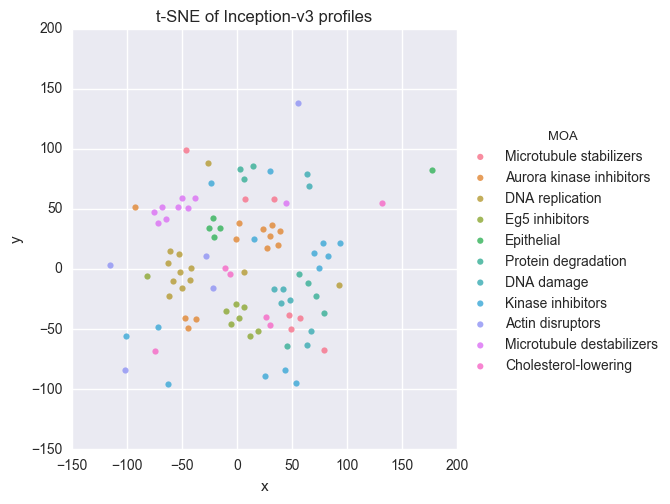

perp 15


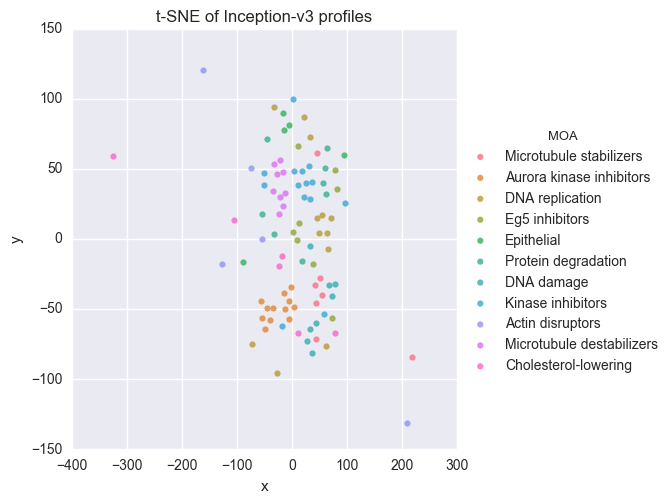

perp 20


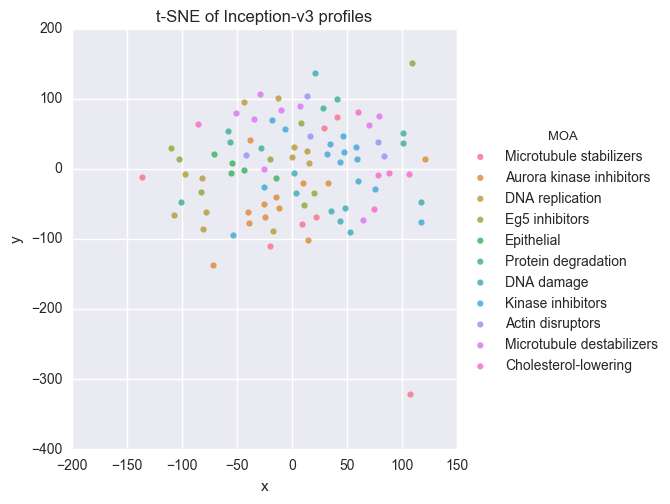

perp 25


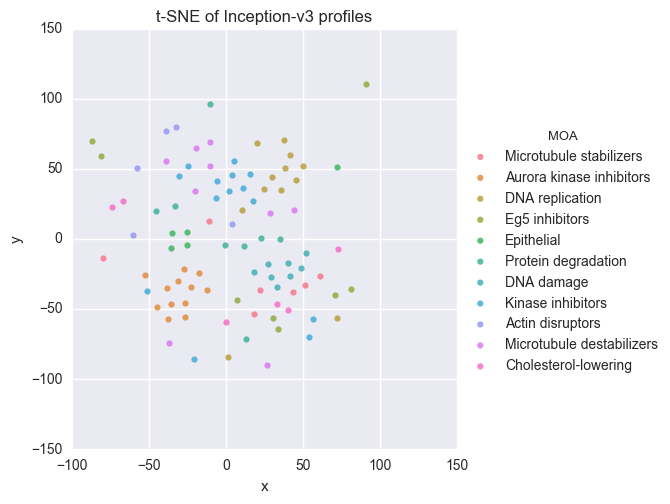

perp 30


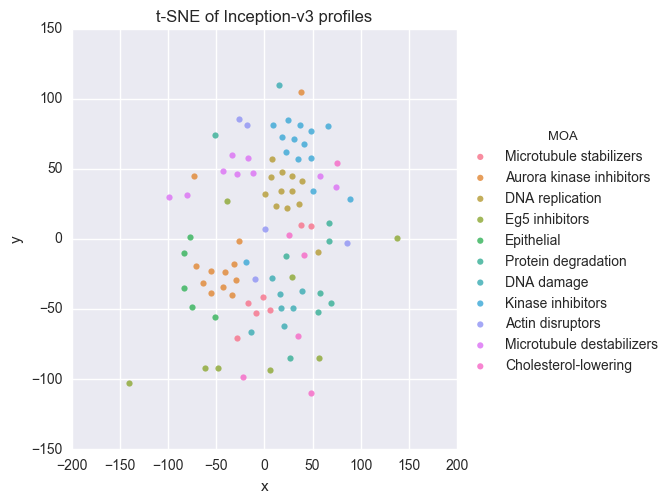

perp 45


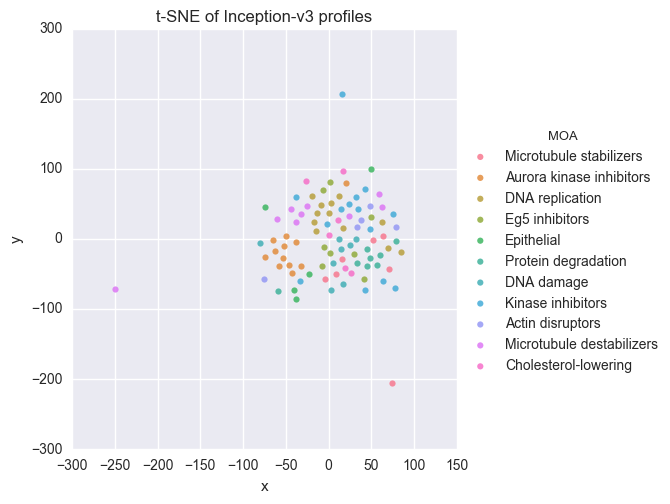

In [36]:
for perp in [10, 15, 20, 25, 30, 45]:
    print 'perp %d' % perp
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(rep_csv.iloc[:, 3:])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['MOA'] = moas
    tsne_reps[['x', 'y']] = reps
    tsne_reps = tsne_reps[tsne_reps['MOA'] != 'DMSO']
    sns.lmplot(x="x", y="y", hue="MOA", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('t-SNE of Inception-v3 profiles')
    plt.show()

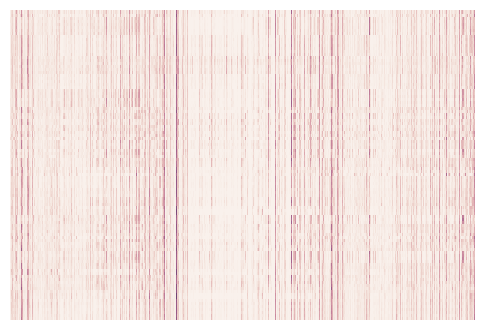

In [40]:
sns.heatmap(rep_csv.iloc[:, 3:], xticklabels=False, yticklabels=False, cbar=None)
plt.show()